<a href="https://colab.research.google.com/github/rajivsresearch/housingbubble/blob/main/FSRAO_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

In [5]:
df = pd.read_excel("FSRAO.xlsx")

I went to the [FSRAO website](https://teao.fsrao.ca/) and downloaded enforcement actions data table. Here is a sample of this table.



In [6]:
df.head()

,Name,Type,License Type,License No,Sector,Related Files,Status,Notice Date
0,Po Yuk (Peggy) Chan,Enforcement Action,Mortgage Agent,M08000648,Mortgage Brokering,No,Ongoing,07-05-2024
1,Approved Mortgage Brokers Inc.,Enforcement Action,Unlicensed,NaN,Mortgage Brokering,Yes,Ongoing,07-04-2024
2,Masoud Asnafi,Enforcement Action,Unlicensed,M12001788,Mortgage Brokering,Yes,Ongoing,07-04-2024
3,Real Mortgage Associates Inc.,Enforcement Action,Mortgage Brokerage,10464,Mortgage Brokering,Yes,Ongoing,07-04-2024
4,Rohan (Ron) De Silva,Enforcement Action,Mortgage Broker,M08011187,Mortgage Brokering,Yes,Ongoing,07-04-2024


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           1316 non-null   object
 1   Type           1316 non-null   object
 2   License Type   1316 non-null   object
 3   License No     1119 non-null   object
 4   Sector         1316 non-null   object
 5   Related Files  1316 non-null   object
 6   Status         1316 non-null   object
 7   Notice Date    1316 non-null   object
dtypes: object(8)
memory usage: 82.4+ KB


In [8]:
df['Notice Date'] = pd.to_datetime(df['Notice Date'])

<Axes: title={'center': 'Enforcement Actions by Type'}, ylabel='Type'>

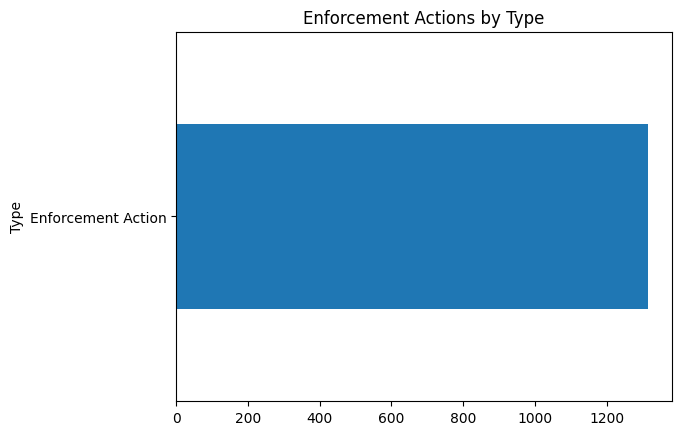

In [9]:
df['Type'].value_counts().plot(kind='barh', title='Enforcement Actions by Type')

Most of the enforcement actions are Insurance Agents followed by Healthcare providers and Mortgage Brokerage, although if included with Mortgage Agent and Mortgage Broker, will be the highest?

<Axes: title={'center': 'Enforcement Actions by License Type'}, ylabel='License Type'>

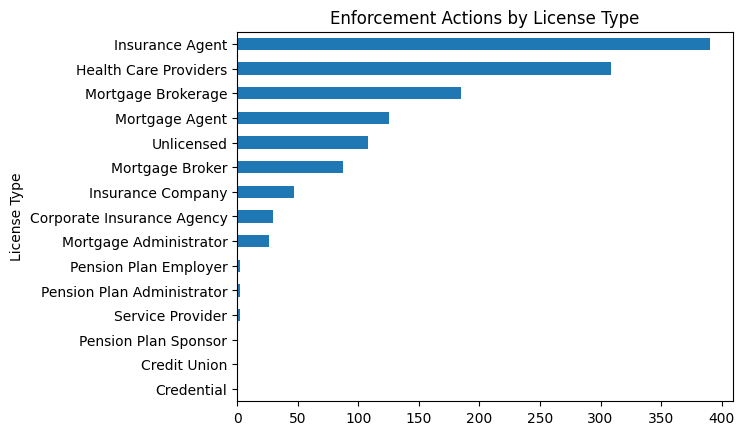

In [10]:
df['License Type'].value_counts().sort_values().plot(kind='barh', title='Enforcement Actions by License Type')

The largest sector for fraud enforcement actions is Insurance followed by Mortgage Brokers.

<Axes: title={'center': 'Enforcement Actions by Sector'}, ylabel='Sector'>

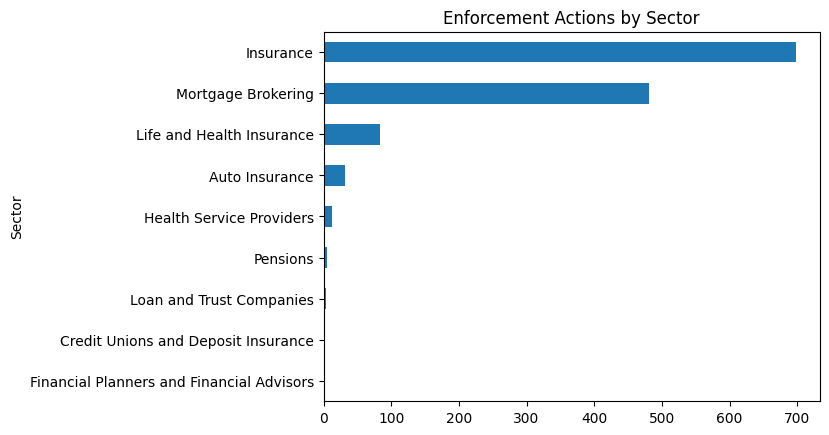

In [11]:
df['Sector'].value_counts().sort_values().plot(kind='barh', title='Enforcement Actions by Sector')

<Axes: title={'center': 'Mortgage Brokering Related Files'}, ylabel='Related Files'>

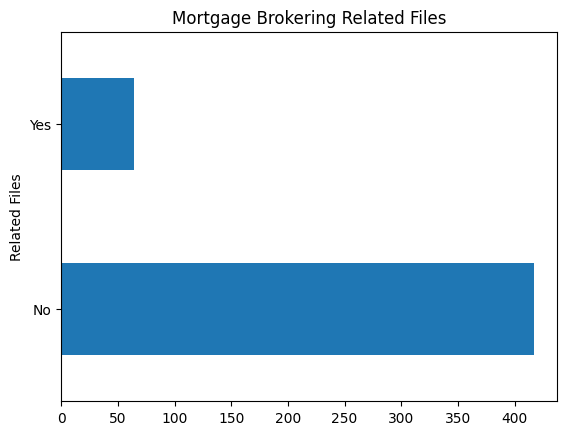

In [12]:
df.loc[df['Sector']=='Mortgage Brokering', 'Related Files'].value_counts().plot(kind='barh', title='Mortgage Brokering Related Files')

Enforcement Actions in Mortgage Brokering sector dropped in 2020, and has not recovered since. Does this mean that the fraud reduced in 2020 and has been tame ever since?

Narrative:

Fraud has been in the news a lot. There have been media reports of fraud mostly in documentation (showing higher income than taxable income) in order to qualify for a higher mortgage. So then why does the enforcement data decline in 2020? And why does the data remain at this declined level since 2020?

<Axes: title={'center': 'Enforcement Actions by year'}, xlabel='Notice Date'>

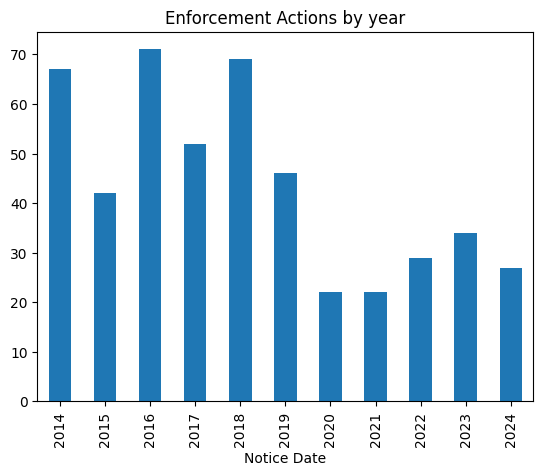

In [13]:
# @title
notice_counts = df.loc[df['Sector']=='Mortgage Brokering', 'Notice Date'].dt.year.value_counts().sort_index()
notice_counts.plot(kind='bar', title='Enforcement Actions by year')

In [14]:
notice_counts.head(6)

Notice Date
2014    67
2015    42
2016    71
2017    52
2018    69
2019    46
Name: count, dtype: int64

Assumption: There is a small amount of fraud that is detected and enforced.

Narrative: But even that small amount got smaller in 2020. Why?

According to trend line from 2014 through 2018 the fraud enforcement should have increased to around 70 in 2023, but was half that number.

Narrative: When fraud detection weakens, does fraud increase as fraudsters become more and more brazen? This could increase the breadth (more people participating in fraud, perhaps giving the semblance of normalcy) and depth of fraud as fraudsters push the envelope with each iteration.  

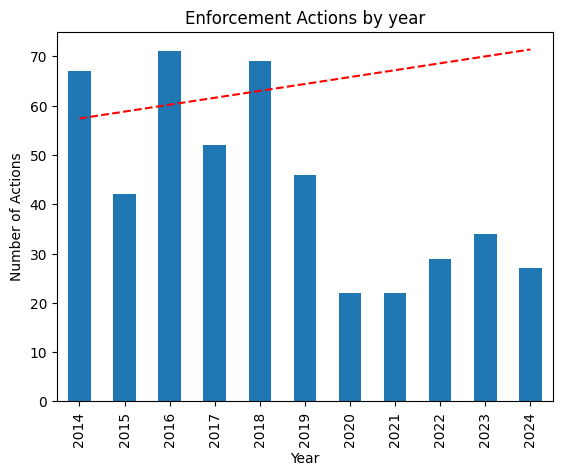

In [15]:
# prompt: plot a trend line through notice_counts.head(5)

import numpy as np
import matplotlib.pyplot as plt

notice_counts.plot(kind='bar', title='Enforcement Actions by year')
plt.ylabel('Number of Actions')
plt.xlabel('Year')
z = np.polyfit(np.arange(5), notice_counts.head(5), 1)
p = np.poly1d(z)
plt.plot(np.arange(11), p(np.arange(11)), color='red', linestyle='dashed')
plt.show()


<Axes: title={'center': 'Enforcement Actions by month'}, xlabel='Notice Date'>

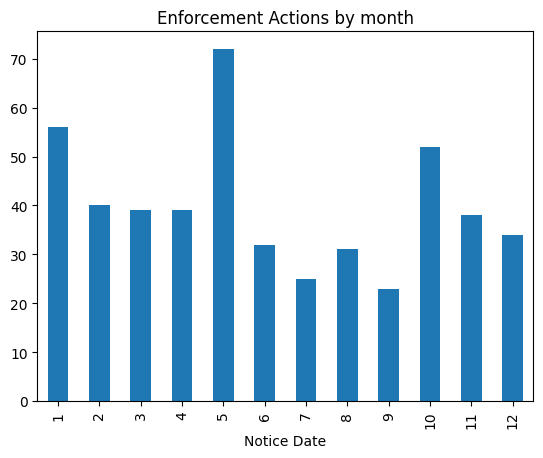

In [19]:
df.loc[df['Sector']=='Mortgage Brokering', 'Notice Date'].dt.month.value_counts().sort_index().plot(kind='bar', title='Enforcement Actions by month')